In [10]:
# Importações
import pandas as pd # type: ignore
import numpy as np # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras import layers, models # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import MinMaxScaler # type: ignore
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # type: ignore
import cv2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
import os # type: ignore


In [11]:
# from google.colab import userdata
# import os

# os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
# os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

# !kaggle datasets download -d tapakah68/yandextoloka-water-meters-dataset
# !unzip "yandextoloka-water-meters-dataset.zip"

In [12]:
# Configurações
DATASET_PATH = "/home/guilherme/Documentos/Dataset's/WaterMeters"


DATA_CSV_PATH = os.path.join(DATASET_PATH, 'data.csv')
IMAGES_FOLDER = os.path.join(DATASET_PATH, "images")
IMAGE_SIZE = (224, 224)  # Tamanho padrão para redes neurais
BATCH_SIZE = 25
EPOCHS = 60

# Configurar seed para reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)


In [13]:
# Carregar dados do CSV
df = pd.read_csv(DATA_CSV_PATH)

# Preparar listas para armazenar imagens e valores
images = []
values = []
photo_names = []

# Iterar sobre registros do DataFrame
for index, row in df.iterrows():
    image_path = os.path.join(IMAGES_FOLDER, row['photo_name'])

    if not os.path.exists(image_path):
        print(f"Aviso: Imagem {image_path} não encontrada.")
        continue

    img = cv2.imread(image_path)
    if img is None:
        print(f"Erro ao carregar imagem: {image_path}")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, IMAGE_SIZE)
    img = img.astype('float32') / 255.0

    images.append(img)
    values.append(row['value'])
    photo_names.append(row['photo_name'])

X = np.array(images)
y = np.array(values)


In [14]:
# y

In [15]:

from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar valores alvo
# scaler = MinMaxScaler()
# y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).flatten()


In [16]:
from tensorflow.keras.applications import VGG16 # type: ignore

model_pre_trained =  VGG16(
    input_shape = X_train.shape[1:],
    include_top = False,
    weights = 'imagenet'
)
model_pre_trained.trainable = False

In [17]:
# from keras.optimizers import Adam
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Criar o modelo CNN
model = models.Sequential([
    # layers.Conv2D(128, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    # layers.Conv2D(128, (3, 3), activation='sigmoid'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='sigmoid'),
    # layers.Conv2D(64, (3, 3), activation='sigmoid'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(32, (3, 3), activation='sigmoid'),
    # layers.Conv2D(32, (3, 3), activation='sigmoid'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(16, (3, 3), activation='sigmoid'),
    # layers.Conv2D(16, (3, 3), activation='sigmoid'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(8, (3, 3), activation='relu'),
    model_pre_trained,
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    # layers.Dropout(0.5),
    layers.Dense(1, activation='ReLU')
])

# Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

# Compilação
# adam = Adam(learning_rate=0.0001)
model.compile(optimizer='RMSprop', loss='mae', metrics=['mse','mae'])

# Resumo do modelo
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 1)                

In [18]:
# Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=1
)


Epoch 1/60
32/32 [==============================] - 80s 2s/step - loss: 379.7550 - mse: 12896679.0000 - mae: 379.7550 - val_loss: 217.8359 - val_mse: 132680.3906 - val_mae: 217.8359
Epoch 2/60
32/32 [==============================] - 78s 2s/step - loss: 364.2999 - mse: 12862580.0000 - mae: 364.2999 - val_loss: 219.0062 - val_mse: 141155.1094 - val_mae: 219.0062
Epoch 3/60
32/32 [==============================] - 78s 2s/step - loss: 355.6234 - mse: 12871881.0000 - mae: 355.6234 - val_loss: 219.4614 - val_mse: 125382.5312 - val_mae: 219.4614
Epoch 4/60
32/32 [==============================] - 78s 2s/step - loss: 351.0607 - mse: 12870064.0000 - mae: 351.0607 - val_loss: 217.8870 - val_mse: 135052.2344 - val_mae: 217.8870
Epoch 5/60
32/32 [==============================] - 78s 2s/step - loss: 340.5146 - mse: 12818886.0000 - mae: 340.5146 - val_loss: 233.7911 - val_mse: 158659.0625 - val_mae: 233.7911
Epoch 6/60
32/32 [==============================] - 78s 2s/step - loss: 333.3096 - mse: 12

<Figure size 640x480 with 0 Axes>

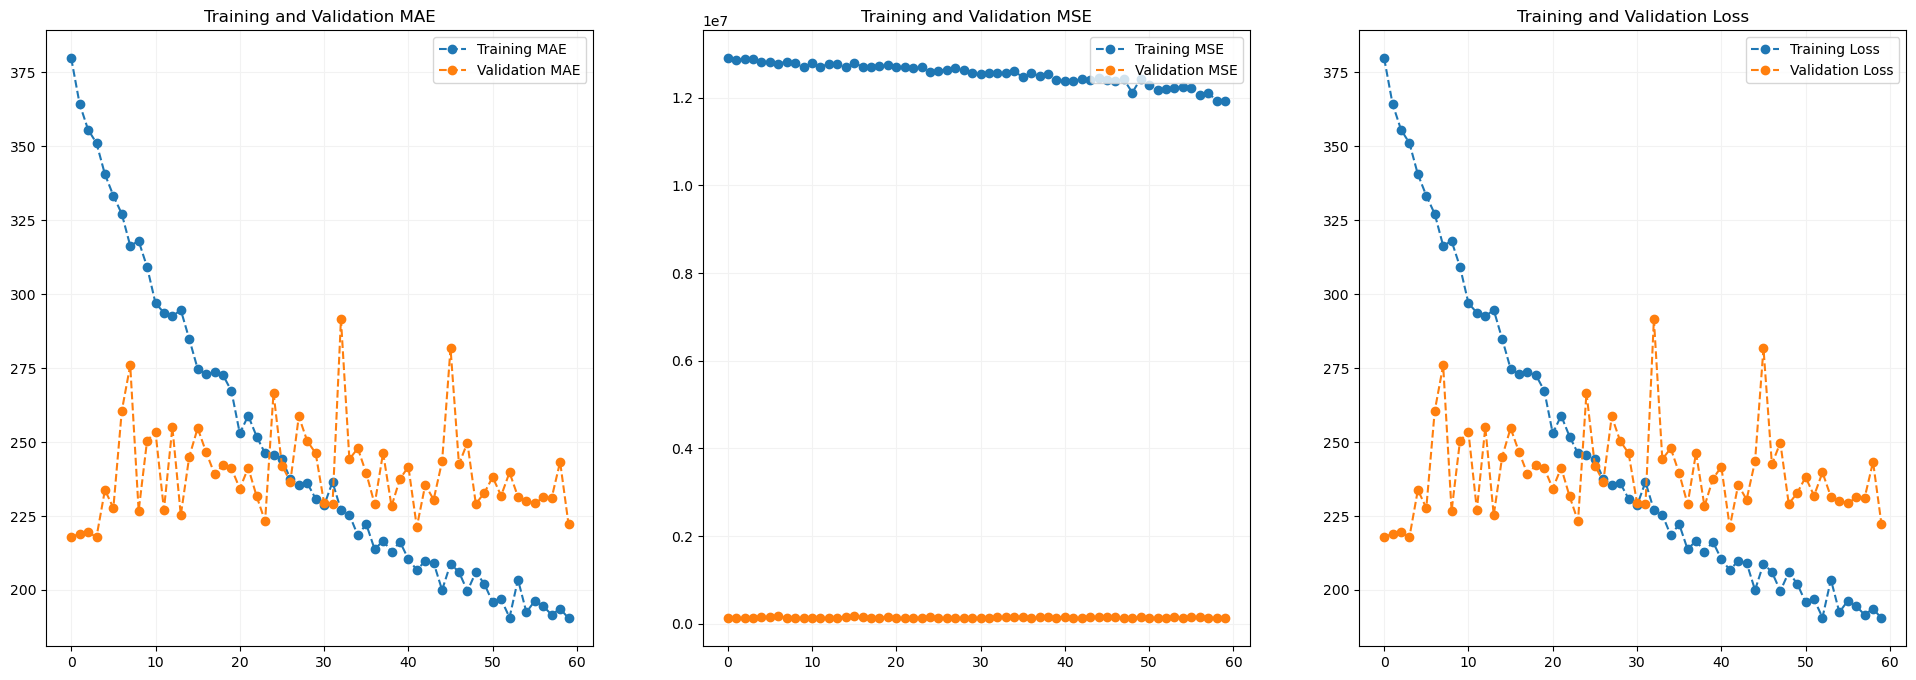

In [19]:
mae = history.history['mae']
val_mae = history.history['val_mae']

mse = history.history['mse']
val_mse = history.history['val_mse']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = list(range(0, EPOCHS))

plt.gcf().clear()
plt.figure(figsize = (24, 8))

plt.subplot(1, 3, 1)
plt.title('Training and Validation MAE')
plt.plot(epochs_range, mae, 'o--', label = 'Training MAE')
plt.plot(epochs_range, val_mae,'o--', label = 'Validation MAE')
plt.grid(axis='both',color='0.95')
plt.legend(loc = 'upper right')

plt.subplot(1, 3, 2)
plt.title('Training and Validation MSE')
plt.plot(epochs_range, mse,'o--', label = 'Training MSE')
plt.plot(epochs_range, val_mse, 'o--', label = 'Validation MSE')
plt.grid(axis='both',color='0.95')
plt.legend(loc = 'upper right')

plt.subplot(1, 3, 3)
plt.title('Training and Validation Loss')
plt.plot(epochs_range, loss,'o--', label = 'Training Loss')
plt.plot(epochs_range, val_loss, 'o--', label = 'Validation Loss')
plt.grid(axis='both',color='0.95')
plt.legend(loc = 'upper right')

In [20]:
result = model.predict(x=X_train,batch_size = 32)

2024-12-11 14:50:11.694335: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 599101440 exceeds 10% of free system memory.


32/32 [==============================] - 72s 2s/step


In [21]:
result = result.flatten()

<Figure size 640x480 with 0 Axes>

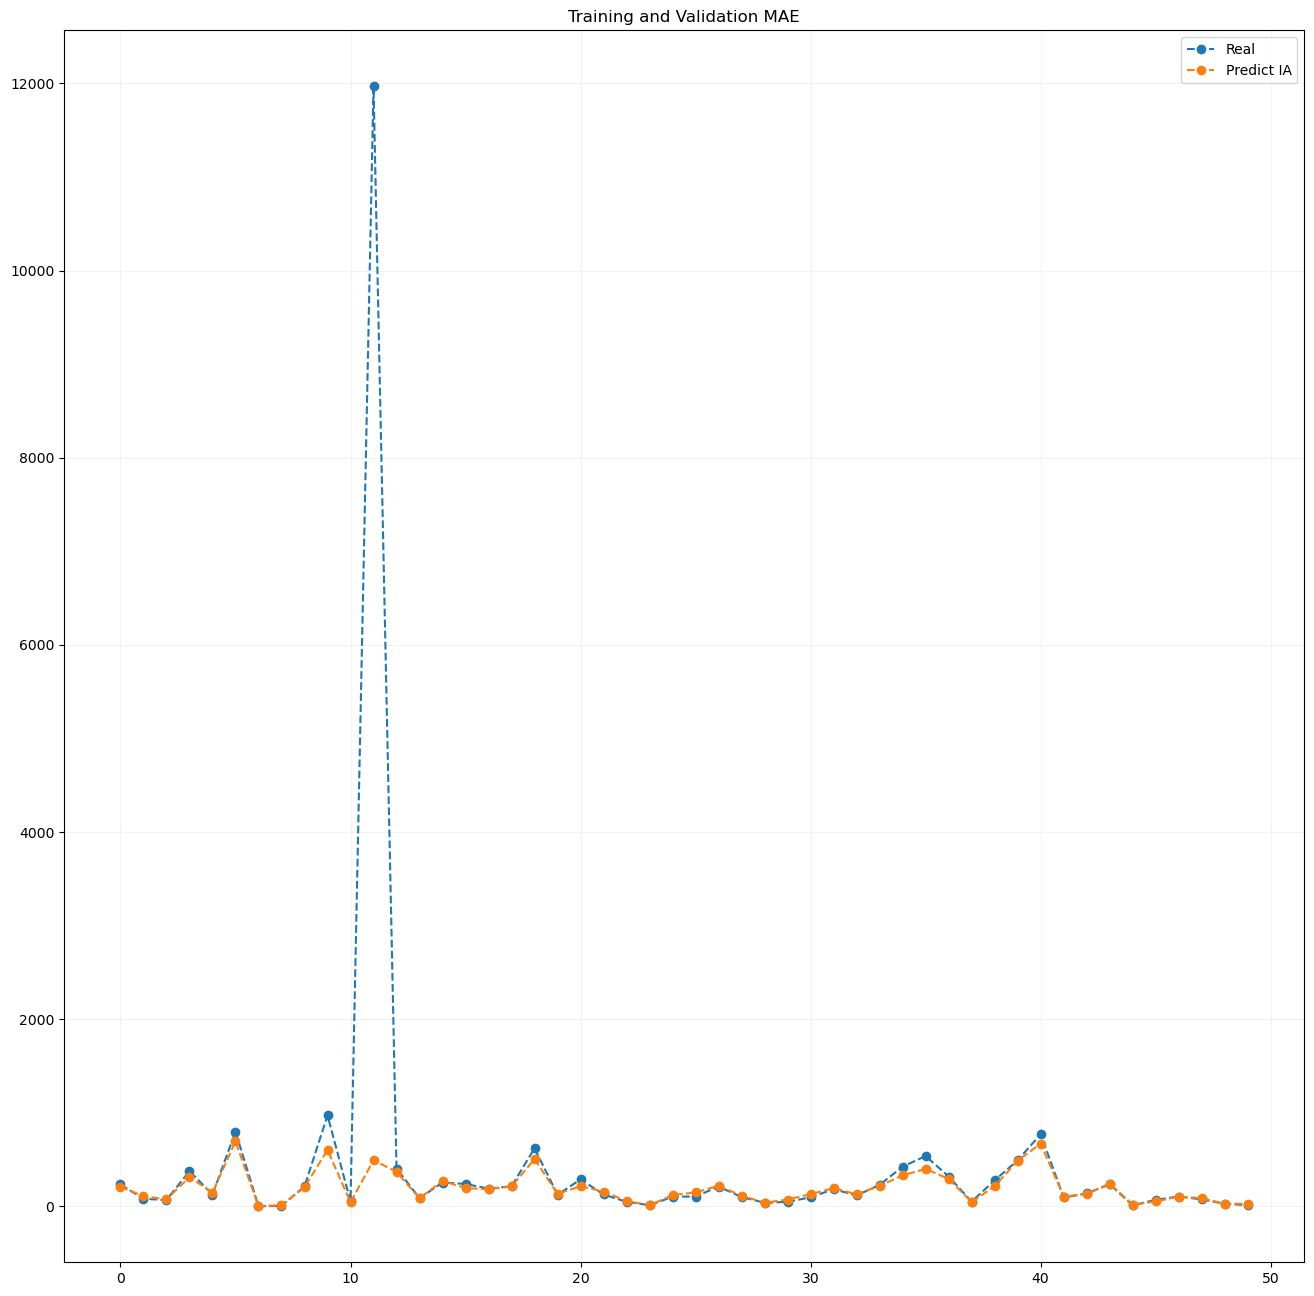

In [22]:
tamanho = 50
range_array = range(tamanho)

plt.gcf().clear()
plt.figure(figsize = (16, 16))

# plt.subplot(1, 3, 1)
plt.title('Training and Validation MAE')
plt.plot(range_array, y_train[:tamanho], 'o--', label = 'Real')
plt.plot(range_array, result[:tamanho],'o--', label = 'Predict IA')
plt.grid(axis='both',color='0.95')
plt.legend(loc = 'upper right')

8/8 [==============================] - 19s 2s/step
Loss no conjunto de teste: [356.3924560546875, 8364529.0, 356.3924560546875]
MAE no conjunto de teste: 356.39243875955486


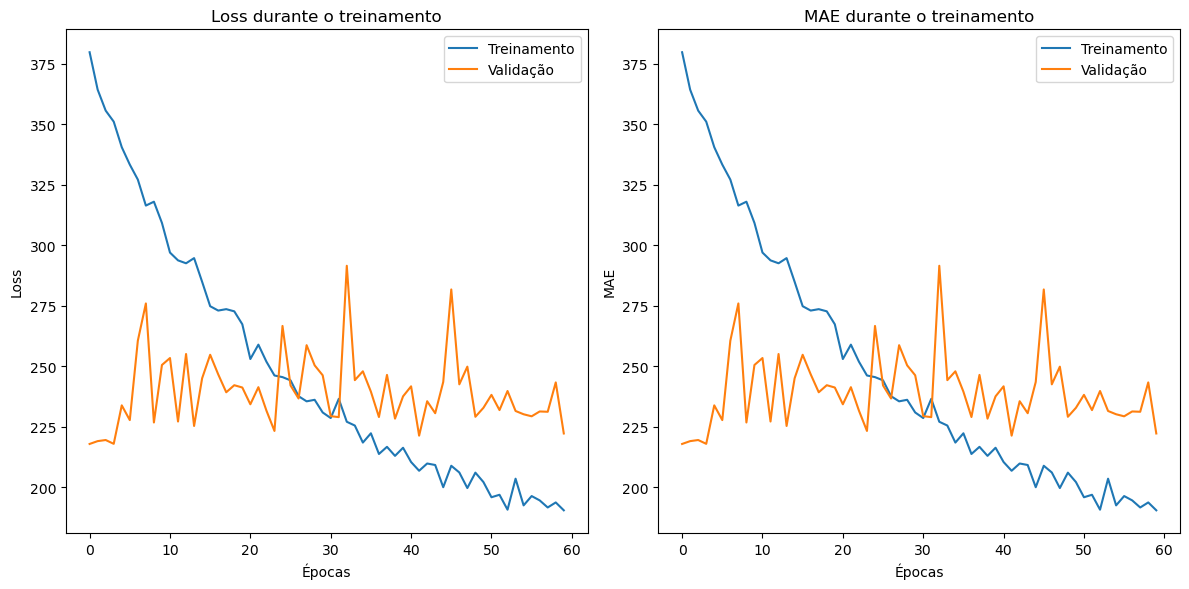

In [24]:

# Avaliação no conjunto de teste
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Previsões no conjunto de teste
y_pred = model.predict(X_test)

# Cálculo do MAE com sklearn
mae = mean_absolute_error(y_test, y_pred)

print(f"Loss no conjunto de teste: {test_loss}")
print(f"MAE no conjunto de teste: {mae}")

# Plotar a curva de treino e validação
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Métrica MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Treinamento')
plt.plot(history.history['val_mae'], label='Validação')
plt.title('MAE durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

8/8 [==============================] - 19s 2s/step
Loss no conjunto de teste: [356.3924560546875, 8364529.0, 356.3924560546875]
Erro Absoluto Médio (MAE) no conjunto de teste: 356.39243875955486


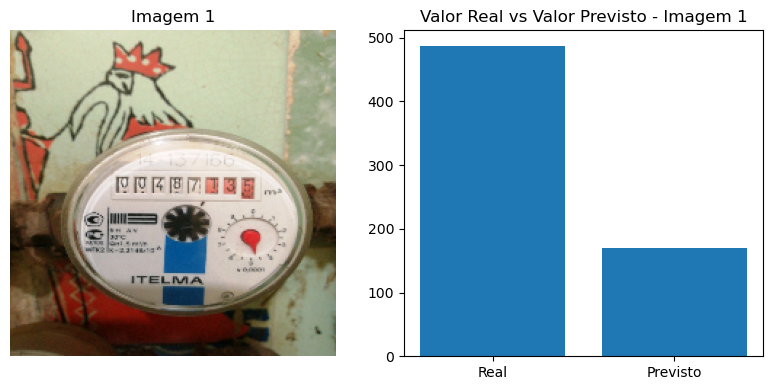

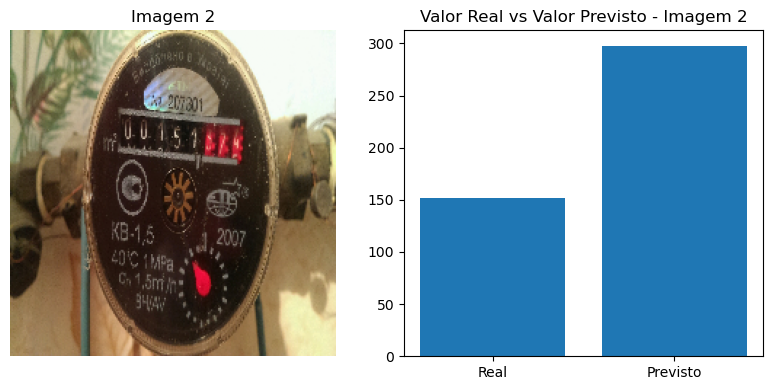

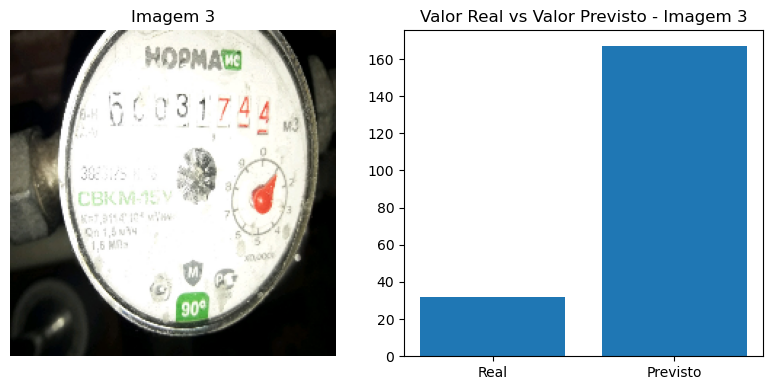

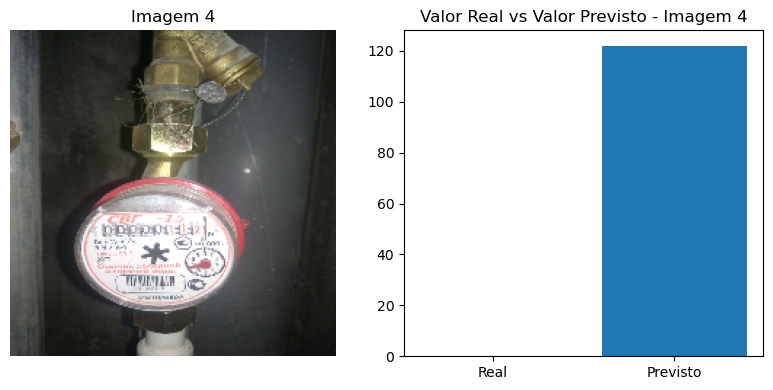

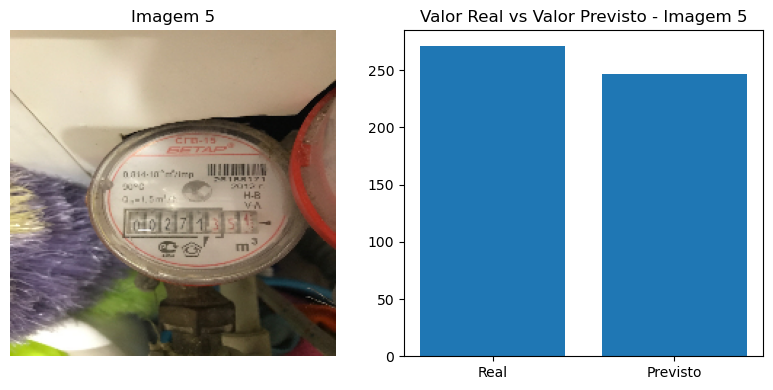

In [25]:
    
# Avaliação no conjunto de teste
test_loss = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)

# Calcular o erro absoluto médio (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"Loss no conjunto de teste: {test_loss}")
print(f"Erro Absoluto Médio (MAE) no conjunto de teste: {mae}")

# Mostrar o valor real, previsto e a imagem para a confirmação
for i in range(5):  # Exibir as primeiras 5 imagens para inspeção
    plt.figure(figsize=(8, 4))
    
    # Exibir a imagem
    plt.subplot(1, 2, 1)
    plt.imshow(X_test[i])  # Certifique-se de que X_test[i] está no formato correto (por exemplo, RGB)
    plt.axis('off')  # Remover os eixos para melhor visualização
    plt.title(f"Imagem {i+1}")
    
    # Exibir os valores reais e previstos
    plt.subplot(1, 2, 2)
    plt.bar(['Real', 'Previsto'], [y_test[i], y_pred[i][0]])
    plt.title(f"Valor Real vs Valor Previsto - Imagem {i+1}")
    
    plt.tight_layout()
    plt.show()